In [1]:
#imports

import numpy as np
import pandas as pd
import scipy
from math import sqrt
from matplotlib import pyplot
import matplotlib.pyplot as plt

#estimators
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

#model metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

#more modeling
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree


In [2]:
df3 = pd.read_csv('cleancreditone.csv')

In [3]:
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cut_age,Bal_Cut,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,2,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,2,3,1
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,3,2,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,3,2,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,5,2,0


In [4]:
#features
X= df3[['SEX', 'EDUCATION', 'MARRIAGE', 'cut_age', 'PAY_0','default']]
y= df3['LIMIT_BAL']
print('Summary of feature sample')
X.head()


Summary of feature sample


,SEX,EDUCATION,MARRIAGE,cut_age,PAY_0,default
0,2,2,1,2,2,1
1,2,2,2,2,-1,1
2,2,2,2,3,0,0
3,2,2,1,3,0,0
4,1,2,1,5,-1,0


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [7]:
#creating loops

algos_class=[]
algos_class.append(('Random Forest Regressor', RandomForestRegressor()))
algos_class.append(('Linear Regression', LinearRegression()))
algos_class.append(('Support  Vector Regression', SVR()))

print(algos_class)
type(algos_class)


[('Random Forest Regressor', RandomForestRegressor()), ('Linear Regression', LinearRegression()), ('Support  Vector Regression', SVR())]


list

In [8]:
results_a = []
names_a = []

for name, model in algos_class:
    result = cross_val_score(model, X, y, cv=3, scoring = 'r2')
    names_a.append(name)
    results_a.append(result)
    
    
for i in range(len(names_a)):
    print(names_a[i], results_a[i].mean())

Random Forest Regressor 0.18753286983170256
Linear Regression 0.1480653906866949
Support  Vector Regression -0.05085417506388068


In [9]:
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cut_age,Bal_Cut,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,2,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,2,3,1
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,3,2,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,3,2,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,5,2,0


In [10]:
#Re-running regression loop with new variables

Xb= df3.iloc[:,2:25]
y= df3['LIMIT_BAL']
print('Summary of feature sample')
Xb.head()


Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
results_b = []
names_b = []

for name, model in algos_class:
    result = cross_val_score(model, Xb, y, cv=3, scoring = 'r2')
    names_b.append(name)
    results_b.append(result)
    
    
for i in range(len(names_b)):
    print(names_b[i], results_b[i].mean())

Random Forest Regressor 0.46711195588409865
Linear Regression 0.35153665570707204
Support  Vector Regression -0.05035048364889335


Most successful modeling was with all features in Random Forest Regressor and it was a .468.

In [12]:
Xb_train, Xb_test, y_train, y_test = train_test_split(Xb, y, test_size = .30, random_state = 123)

In [13]:
rfr = RandomForestRegressor()
rfr.model = rfr.fit(Xb_train,y_train)

In [14]:
predictions = rfr.model.predict(Xb_test)

In [15]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [16]:
predRsquared = r2_score(y_test,predictions)

In [17]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.466
RMSE: 94021.844


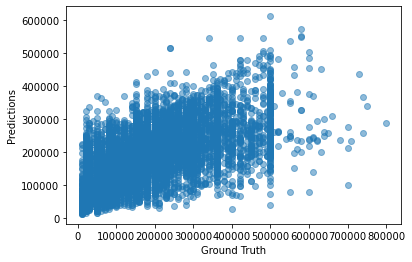

In [18]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [19]:
#using categorical modeling to answer additional questions


In [20]:
#creating more loops

algos_class2=[]
algos_class2.append(('Random Forest Classifier', RandomForestClassifier()))
algos_class2.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_class2.append(('Ada Boost Classifier', AdaBoostClassifier()))
algos_class2.append(('K Nearest Neightbor Classifier', KNeighborsClassifier()))



print(algos_class2)
type(algos_class2)

[('Random Forest Classifier', RandomForestClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier()), ('Ada Boost Classifier', AdaBoostClassifier()), ('K Nearest Neightbor Classifier', KNeighborsClassifier())]


list

In [21]:
Xc= df3.iloc[:,2:25]
yc= df3['Bal_Cut']

print(Xc.head())
print(yc.head())

   SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0    2          2         1   24      2      2     -1     -1     -2     -2   
1    2          2         2   26     -1      2      0      0      0      2   
2    2          2         2   34      0      0      0      0      0      0   
3    2          2         1   37      0      0      0      0      0      0   
4    1          2         1   57     -1      0     -1      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         

In [22]:
#creating train and test data for cut limit balance

X_trainc, X_testc , y_trainc, y_testc = train_test_split(Xc, yc, test_size = .30, random_state = 123)

print('The Data Shape is', X_trainc.shape, y_trainc.shape)

results_c = []
names_c = []

for name, model in algos_class2:
    result = cross_val_score(model, X_trainc, y_trainc, cv=5, scoring = 'accuracy')
    names_c.append(name)
    results_c.append(result)
    
    
for i in range(len(names_c)):
    print(names_c[i], results_c[i].mean())

The Data Shape is (21000, 23) (21000,)
Random Forest Classifier 0.6103333333333334
Decision Tree Classifier 0.5086190476190475
Ada Boost Classifier 0.5592380952380953
K Nearest Neightbor Classifier 0.5566190476190476


In [23]:
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.model = dtc.fit(X_trainc, y_trainc)



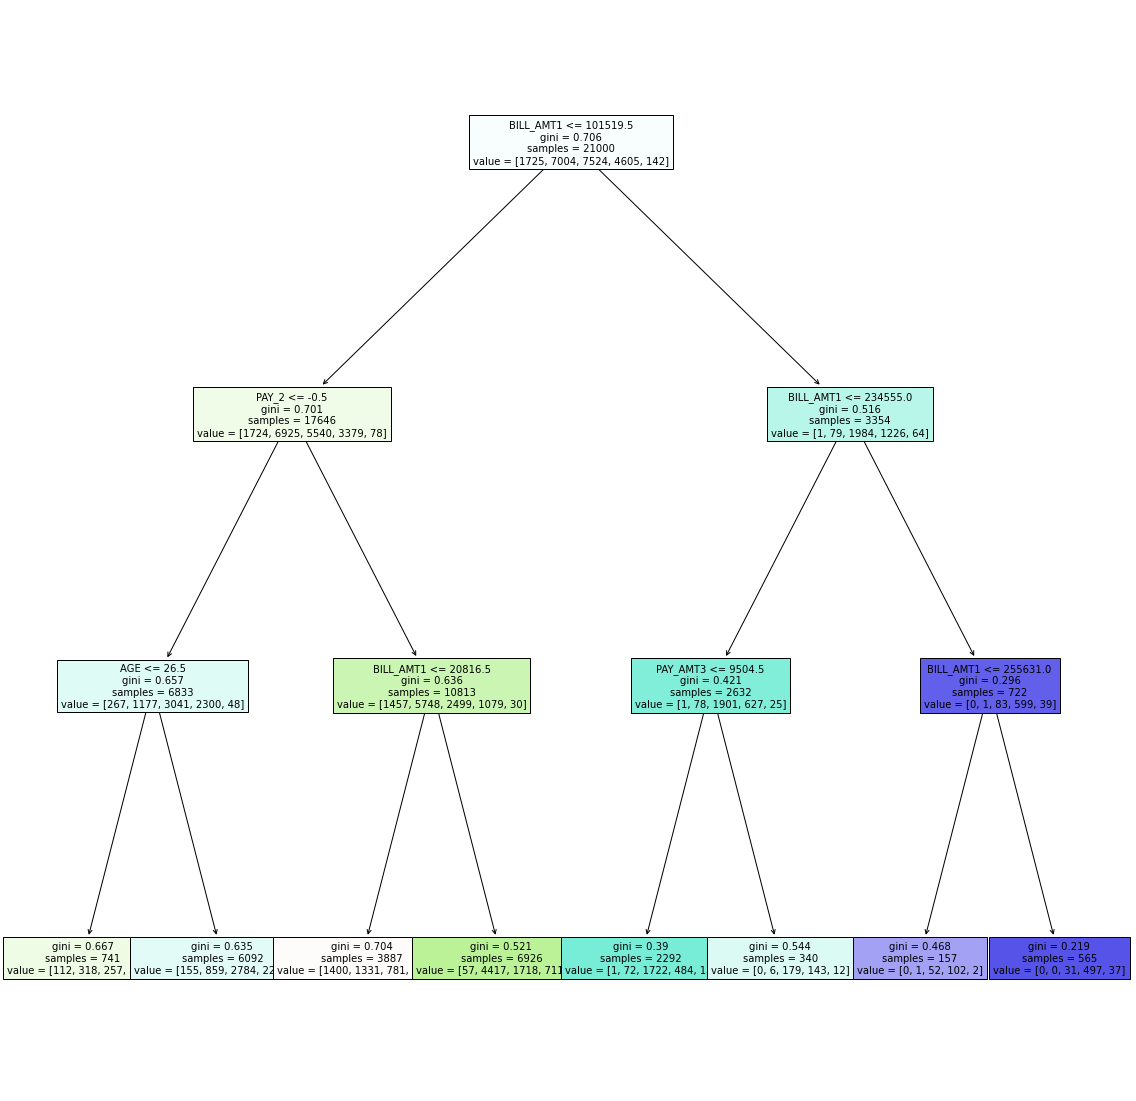

In [24]:
plt.figure(figsize=(20, 20))
plot_tree(dtc.model,
         feature_names=Xc.columns,
         filled = True,
         fontsize=10)
plt.show()

In [25]:
Xd= df3.iloc[:,6:26]
yd= df3['Bal_Cut']

print(Xd.head())
print(yd.head())

   PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0      2      2     -1     -1     -2     -2       3913       3102        689   
1     -1      2      0      0      0      2       2682       1725       2682   
2      0      0      0      0      0      0      29239      14027      13559   
3      0      0      0      0      0      0      46990      48233      49291   
4     -1      0     -1      0      0      0       8617       5670      35835   

   BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0          0          0          0         0       689         0         0   
1       3272       3455       3261         0      1000      1000      1000   
2      14331      14948      15549      1518      1500      1000      1000   
3      28314      28959      29547      2000      2019      1200      1100   
4      20940      19146      19131      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default payment next month 

In [26]:
X_traind, X_testd , y_traind, y_testd = train_test_split(Xd, yd, test_size = .30, random_state = 123)

print('The Data Shape is', X_traind.shape, y_traind.shape)

results_d = []
names_d = []

for name, model in algos_class2:
    result = cross_val_score(model, X_traind, y_traind, cv=5, scoring = 'accuracy')
    names_d.append(name)
    results_d.append(result)
    
    
for i in range(len(names_d)):
    print(names_d[i], results_d[i].mean())

The Data Shape is (21000, 20) (21000,)
Random Forest Classifier 0.597047619047619
Decision Tree Classifier 0.5059523809523808
Ada Boost Classifier 0.5510476190476191
K Nearest Neightbor Classifier 0.5568095238095238


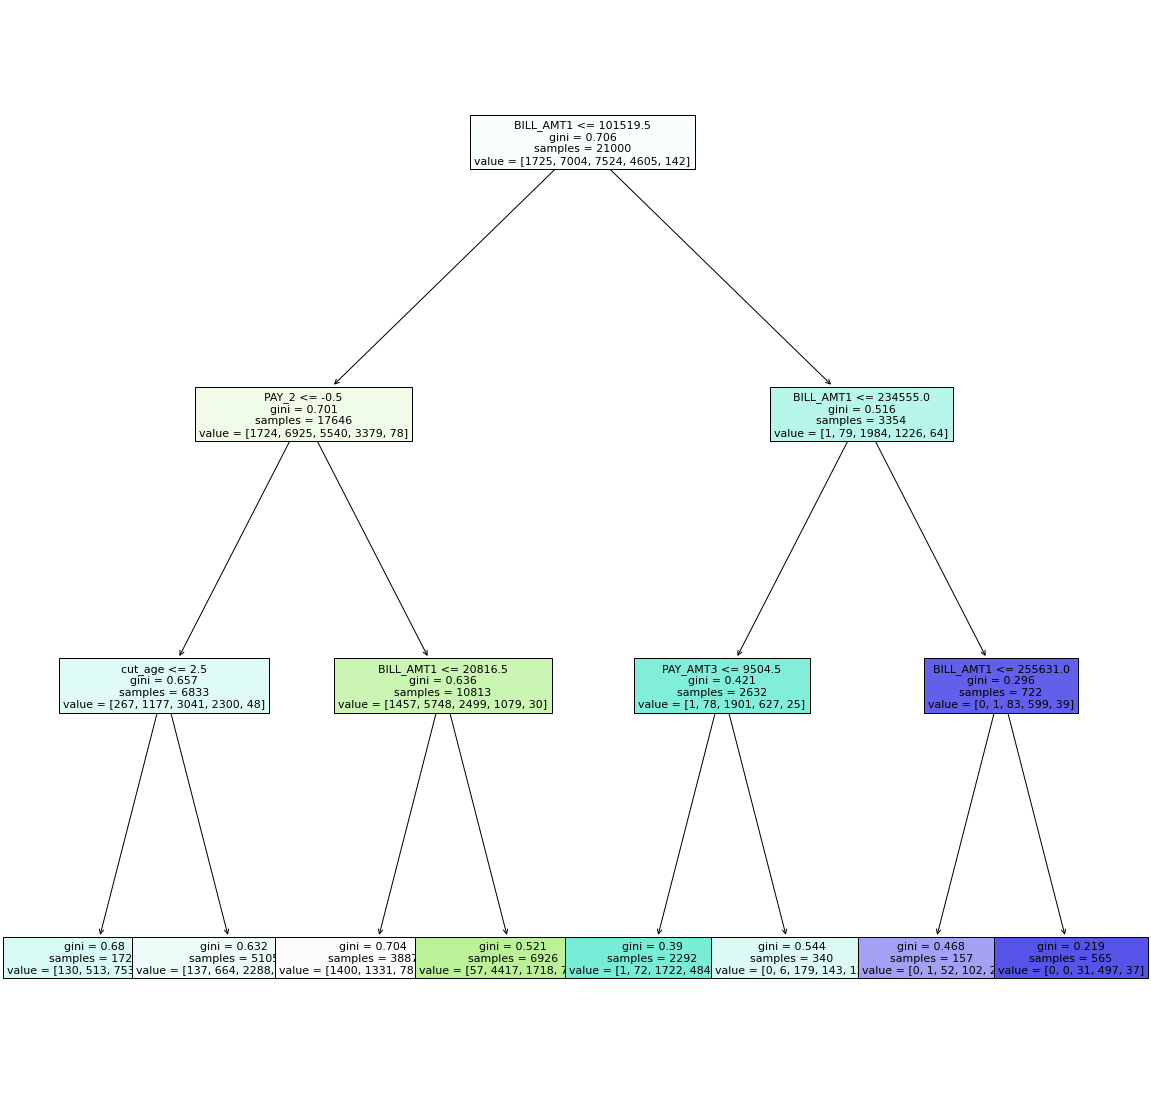

In [27]:
dtc2 = DecisionTreeClassifier(max_depth = 3)
dtc2.model = dtc2.fit(X_traind, y_traind)
plt.figure(figsize=(20, 20))
plot_tree(dtc2.model,
         feature_names=Xd.columns,
         filled = True,
         fontsize=11)
plt.show()

in both DTC the biggest nodes were Bill Amt 1 and Pay 2


In [28]:
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cut_age,Bal_Cut,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,2,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,2,3,1
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,3,2,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,3,2,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,5,2,0


In [29]:
Xe= df3.iloc[:,1:24]
ye= df3['default payment next month']

print(Xe.head())
print(ye.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...        689          0          0          0         0       689   
1      0  ...       2682       3272       3455       3261         0      1000   
2      0  ...      13559      14331      14948      15549      1518      1500   
3      0  ...      49291      28314      28959      29547      2000      2019   
4      0  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         0       

In [30]:
#running loops with default status as the independent variable

X_traine, X_teste , y_traine, y_teste = train_test_split(Xe, ye, test_size = .30, random_state = 123)

print('The Data Shape is', X_traine.shape, y_traine.shape)

results_e = []
names_e = []

for name, model in algos_class2:
    result = cross_val_score(model, X_traine, y_traine, cv=5, scoring = 'accuracy')
    names_e.append(name)
    results_e.append(result)
    
    
for i in range(len(names_e)):
    print(names_e[i], results_e[i].mean())

The Data Shape is (21000, 23) (21000,)
Random Forest Classifier 0.8148571428571427
Decision Tree Classifier 0.7244761904761905
Ada Boost Classifier 0.8157142857142856
K Nearest Neightbor Classifier 0.7488571428571429


In [31]:
from sklearn.tree import export_graphviz

In [32]:
dtc3 = RandomForestClassifier(n_estimators=100, max_depth=5)
dtc3.model = dtc3.fit(X_traine, y_traine)

dtc3.estimators_


[DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1327759921),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=485208269),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1136059199),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1788594895),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=265187366),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1569049190),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1815954060),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=520924480),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1811076904),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=280893163),
 DecisionTreeClassif

In [33]:
print(len(dtc3.estimators_))

100


In [34]:
dtc3.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1327759921)

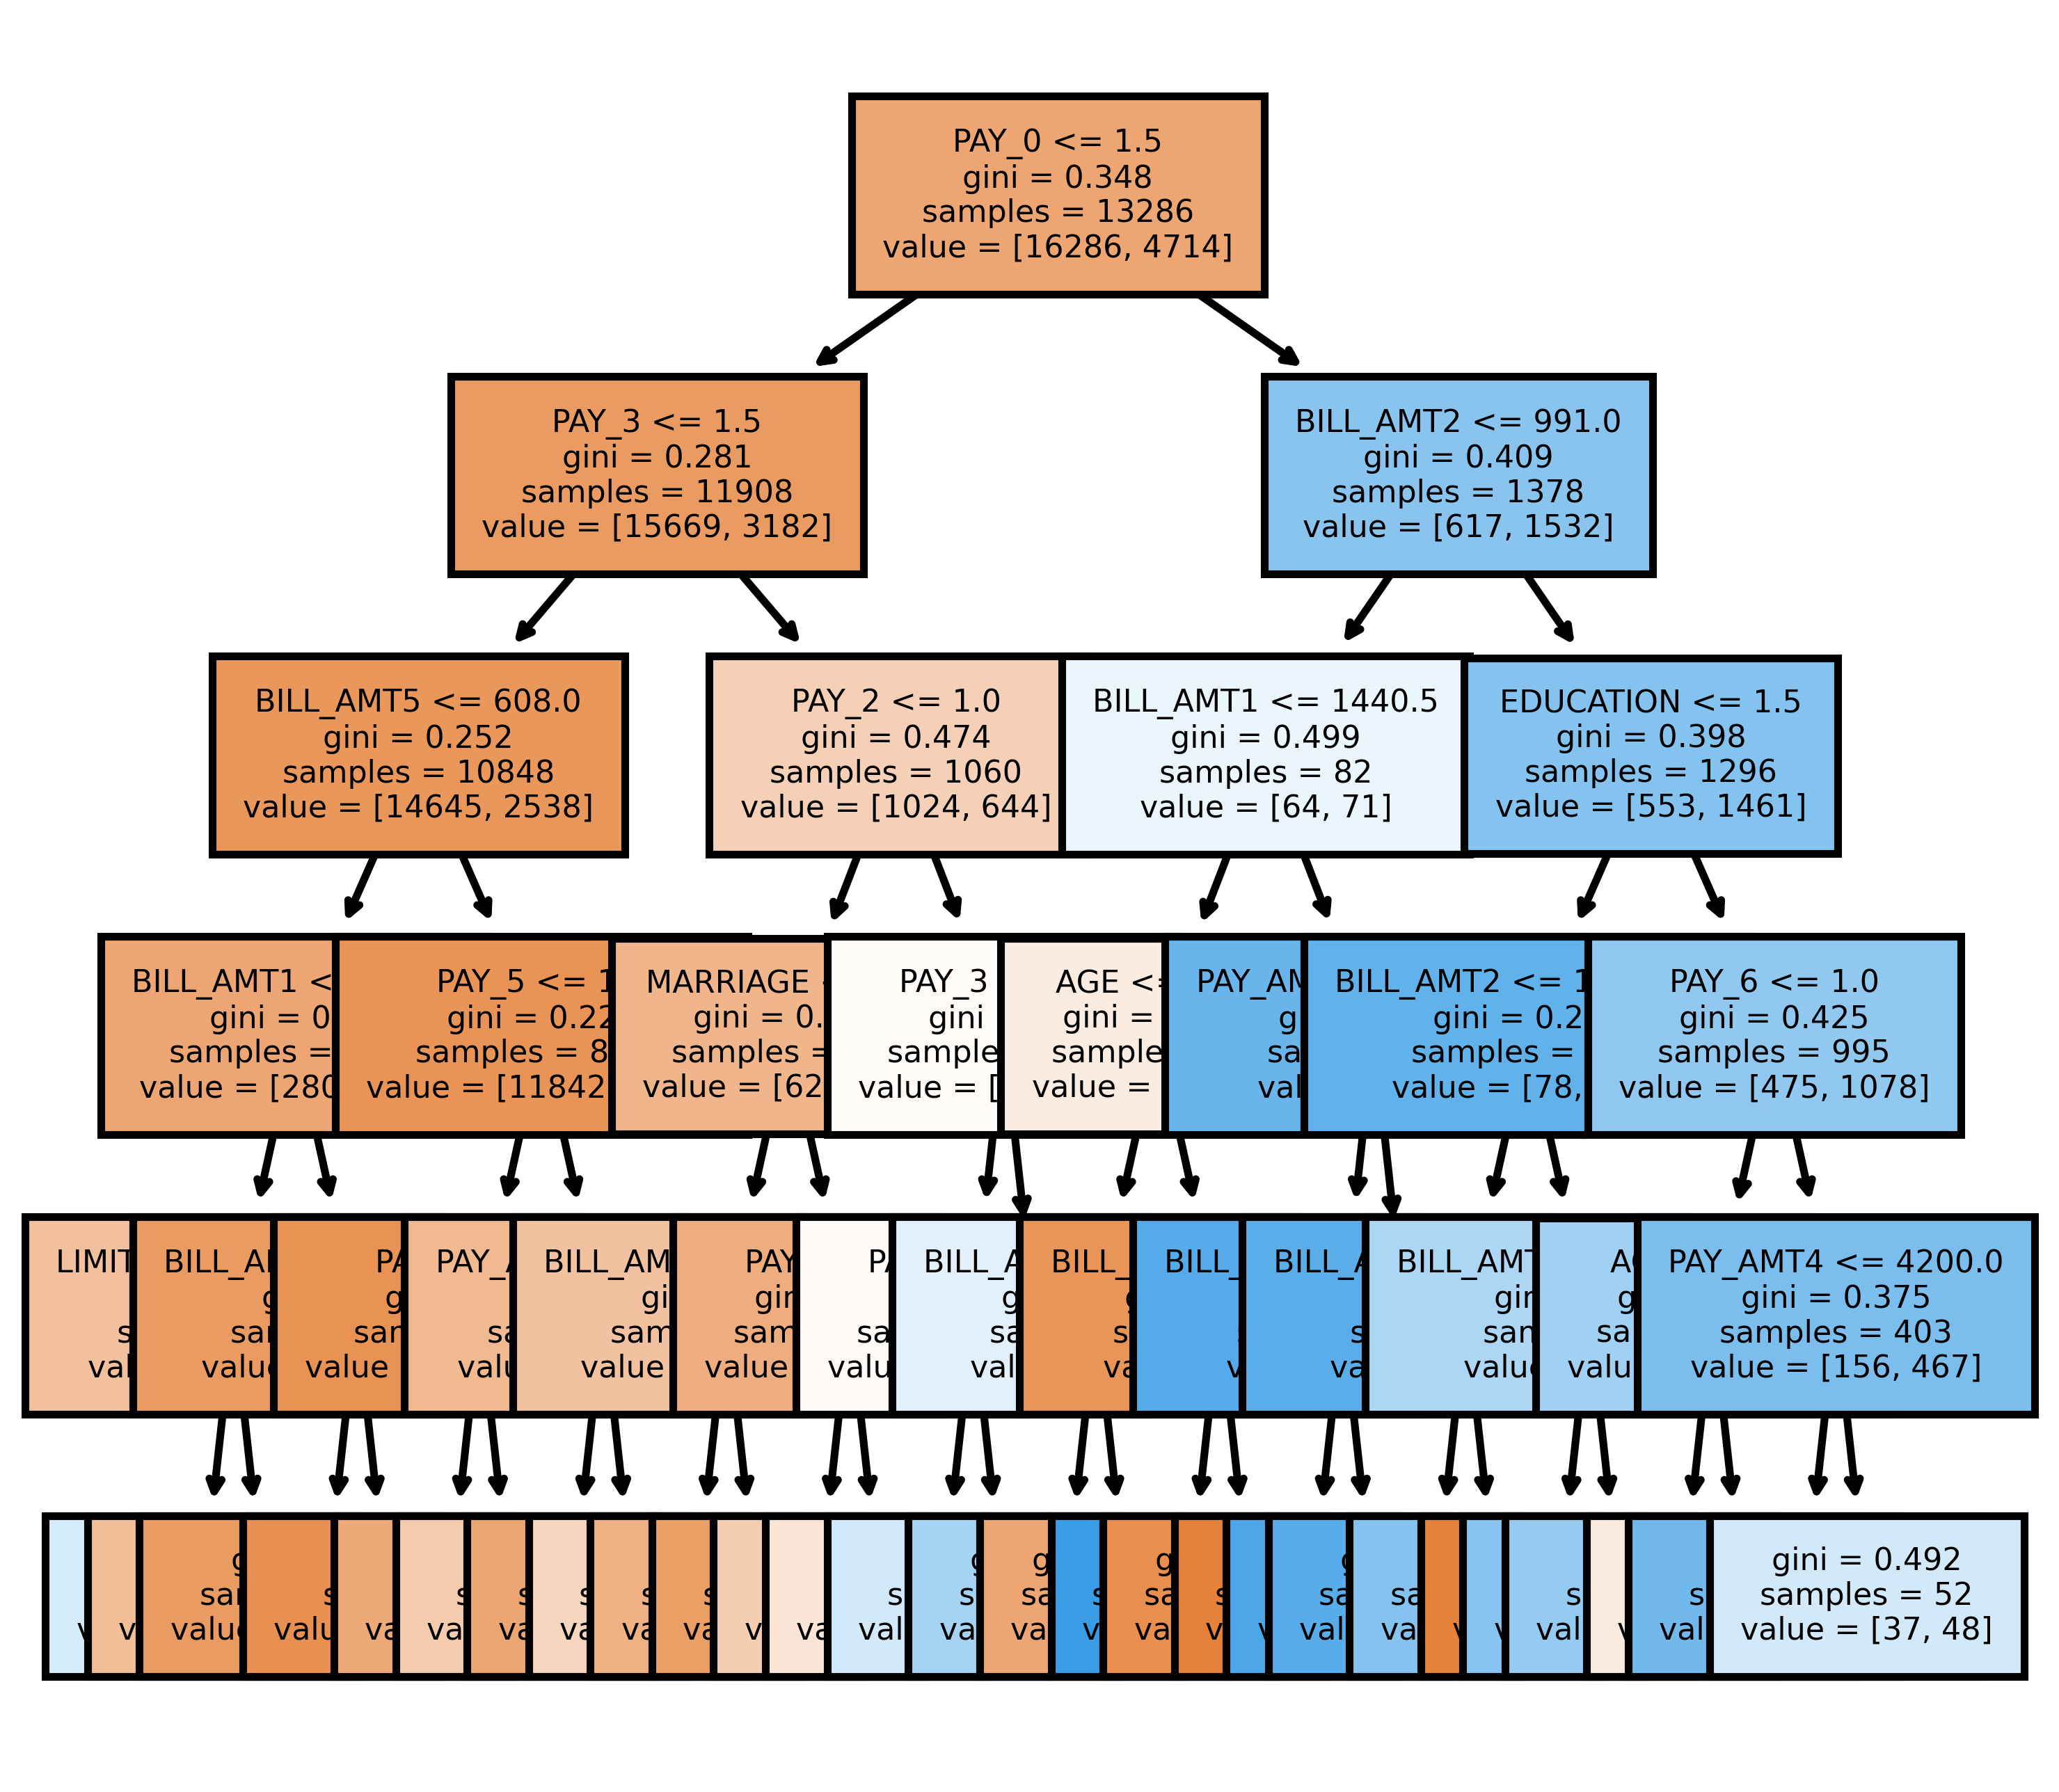

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(dtc3.estimators_[0],
               feature_names = Xe.columns,
               filled = True,
         fontsize=4);
fig.savefig('rf_individualtree.png')

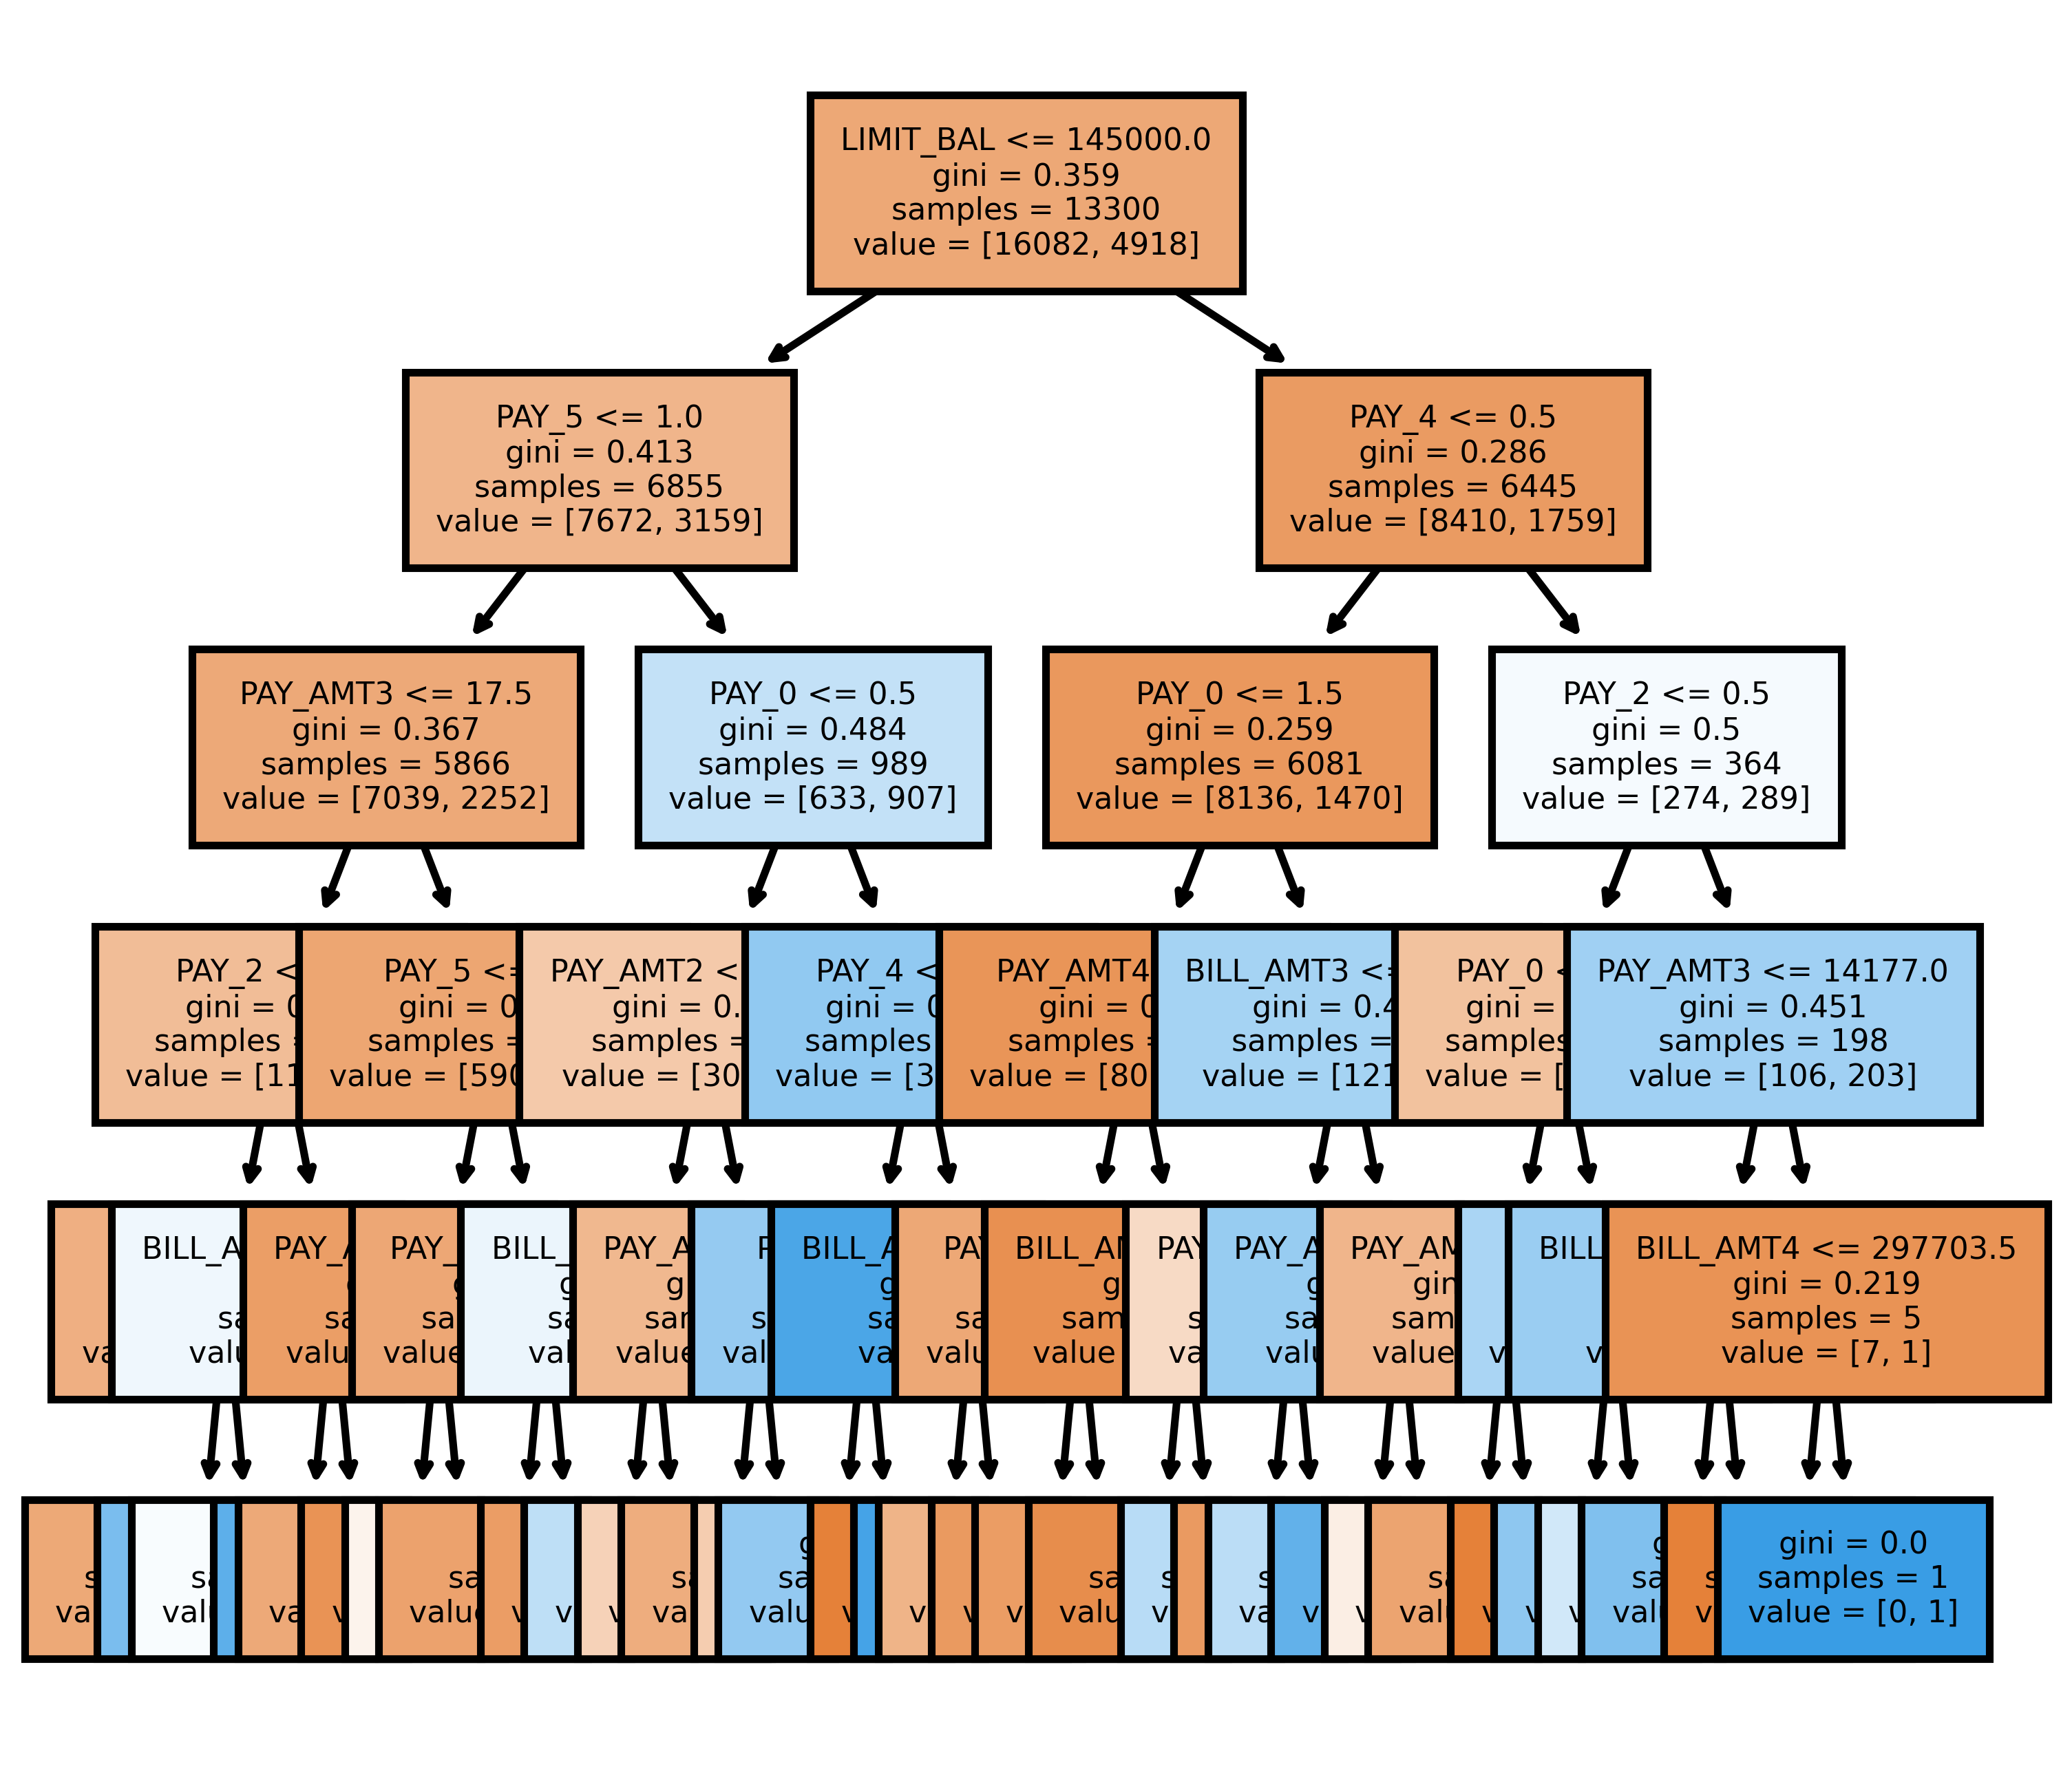

In [36]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(dtc3.estimators_[1],
               feature_names = Xe.columns,
               filled = True,
         fontsize=4);
fig.savefig('rf_individualtree.png')


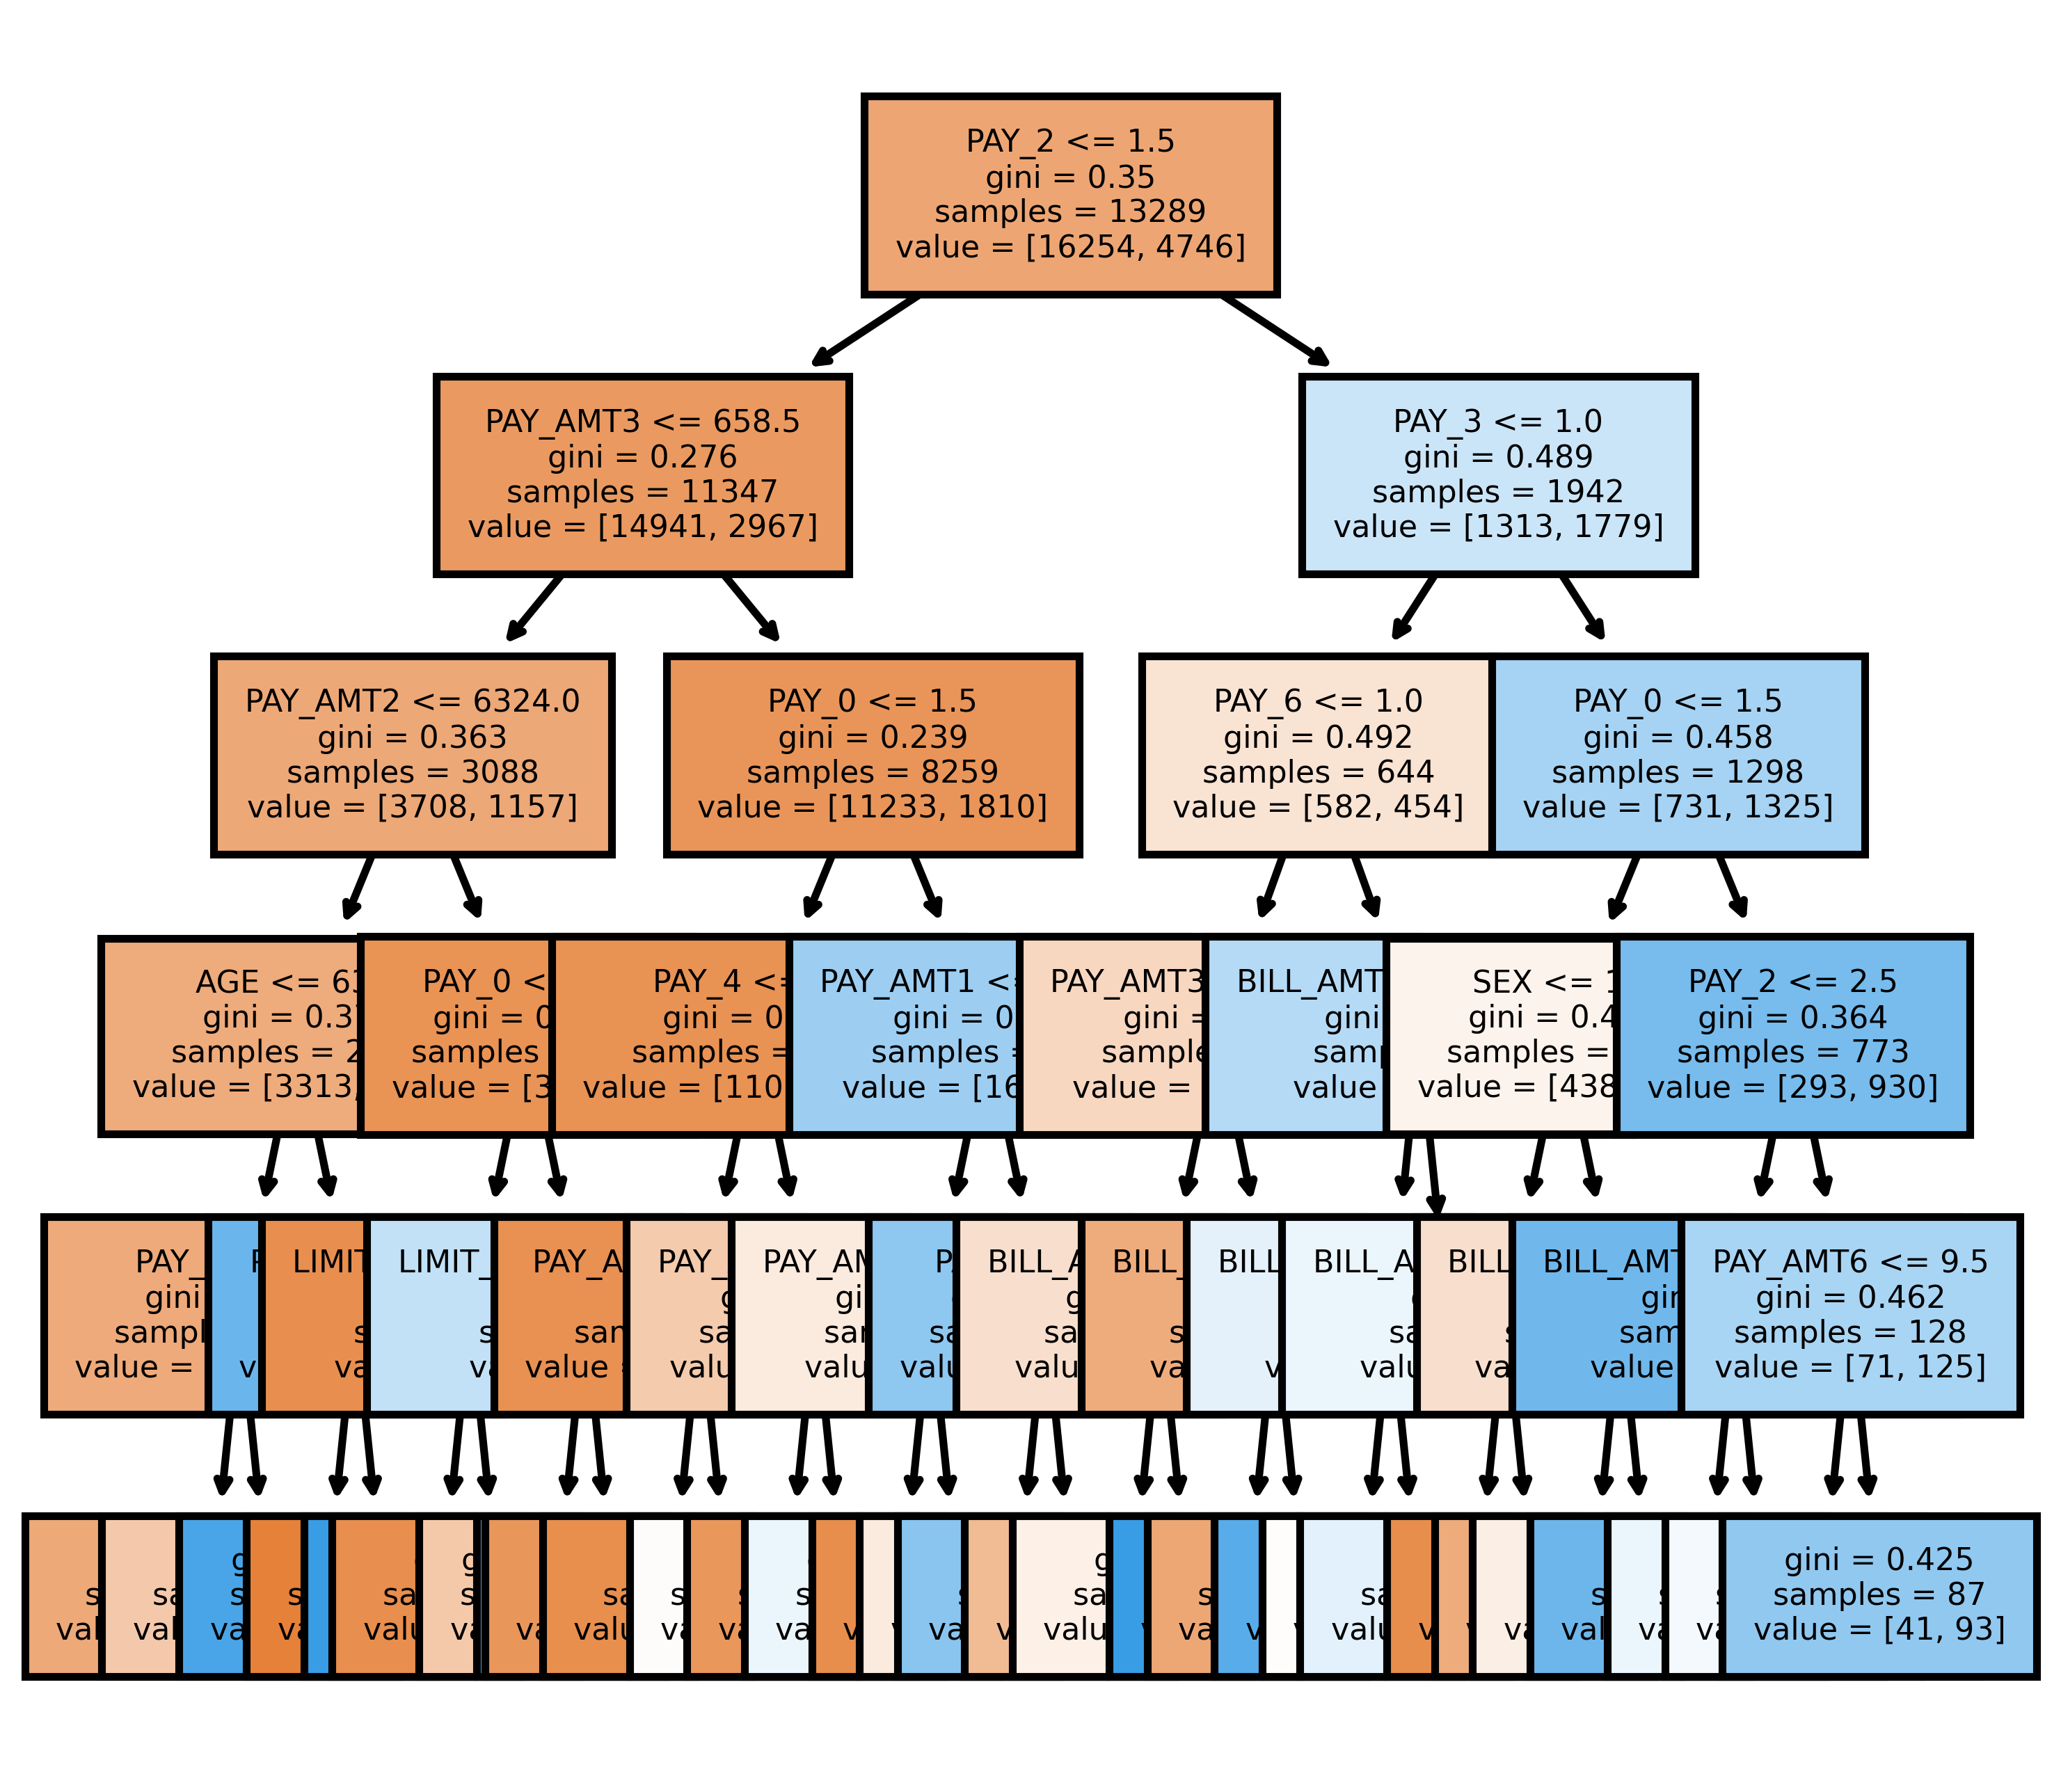

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(dtc3.estimators_[2],
               feature_names = Xe.columns,
               filled = True,
         fontsize=4);
fig.savefig('rf_individualtree.png')

In [38]:
df3.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cut_age,Bal_Cut,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,2,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,2,3,1
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,3,2,0
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,3,2,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,5,2,0


In [39]:
Xf= df3[['MARRIAGE','SEX','EDUCATION', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','cut_age','Bal_Cut']]
yf= df3['default payment next month']

print(Xf.head())
print(yf.head())

   MARRIAGE  SEX  EDUCATION  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0         1    2          2      2      2     -1     -1     -2     -2   
1         2    2          2     -1      2      0      0      0      2   
2         2    2          2      0      0      0      0      0      0   
3         1    2          2      0      0      0      0      0      0   
4         1    1          2     -1      0     -1      0      0      0   

   BILL_AMT1  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0       3913  ...          0          0         0       689         0   
1       2682  ...       3455       3261         0      1000      1000   
2      29239  ...      14948      15549      1518      1500      1000   
3      46990  ...      28959      29547      2000      2019      1200   
4       8617  ...      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  cut_age  Bal_Cut  
0         0         0         0        2        1  
1      1000       

In [40]:
#running loops with default status as the independent variable with cut ages and amount bins 

X_trainf, X_testf , y_trainf, y_testf = train_test_split(Xf, yf, test_size = .30, random_state = 123)

print('The Data Shape is', X_trainf.shape, y_trainf.shape)

results_f = []
names_f = []

for name, model in algos_class2:
    result = cross_val_score(model, X_trainf, y_trainf, cv=5, scoring = 'accuracy')
    names_f.append(name)
    results_f.append(result)
    
    
for i in range(len(names_f)):
    print(names_f[i], results_f[i].mean())

The Data Shape is (21000, 23) (21000,)
Random Forest Classifier 0.8132380952380952
Decision Tree Classifier 0.7222380952380952
Ada Boost Classifier 0.817047619047619
K Nearest Neightbor Classifier 0.7594285714285715


no signifcant change in accuracy with using the cut bins and ages. only positive increase was to Ada Boost Classifier for .2%

In [46]:
from sklearn.inspection import permutation_importance

In [47]:
dtc3.feature_importances_

array([0.02134268, 0.00086654, 0.00162744, 0.00081436, 0.00390703,
       0.30674713, 0.20520866, 0.12855924, 0.0673378 , 0.0567898 ,
       0.05936783, 0.01144297, 0.00845357, 0.00648062, 0.00704547,
       0.0086825 , 0.00457214, 0.02773068, 0.01778234, 0.0219716 ,
       0.01306727, 0.0122714 , 0.00793095])

<BarContainer object of 23 artists>

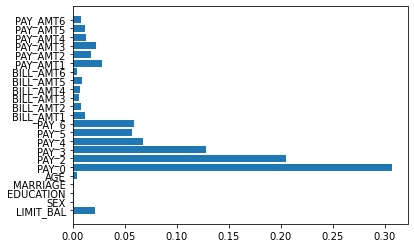

In [50]:
plt.barh(Xe.columns, dtc3.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

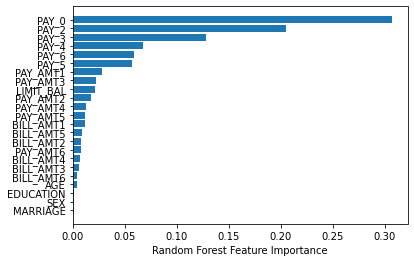

In [52]:
sorted_idx = dtc3.feature_importances_.argsort()
plt.barh(Xe.columns[sorted_idx], dtc3.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [54]:
#updating bins to see if that improves accuracy of the model - dont want to change it too much


cut_bins= [1,9999, 100000, 250000, 500000, 1500000]
df3['Bal_Cut'] = pd.cut(df3['LIMIT_BAL'], bins=cut_bins, labels=False)

In [55]:
X_traind, X_testd , y_traind, y_testd = train_test_split(Xd, yd, test_size = .30, random_state = 123)

print('The Data Shape is', X_traind.shape, y_traind.shape)

results_d = []
names_d = []

for name, model in algos_class2:
    result = cross_val_score(model, X_traind, y_traind, cv=5, scoring = 'accuracy')
    names_d.append(name)
    results_d.append(result)
    
    
for i in range(len(names_d)):
    print(names_d[i], results_d[i].mean())

The Data Shape is (21000, 20) (21000,)
Random Forest Classifier 0.5978571428571429
Decision Tree Classifier 0.5046666666666667
Ada Boost Classifier 0.5510476190476191
K Nearest Neightbor Classifier 0.5568095238095238
